In [1]:
import eda
import pandas as pd
import ajust_datasets
import preparation
import warnings
warnings.filterwarnings("ignore")

c:\Users\Rania\anaconda3\envs\basee\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## EDA

#### Getting data insights

In [2]:
#ajust_datasets.get_bank()
data = pd.read_csv('ban_data.csv')
target_column='Cible'
eda.summarize_data(data, target_column=target_column)

Shape of dataset: (1000, 21)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Statut_compte_courant   1000 non-null   object
 1   Duree_mois              1000 non-null   int64 
 2   Historique_credit       1000 non-null   object
 3   Objectif                1000 non-null   object
 4   Montant_credit          1000 non-null   int64 
 5   Compte_epargne          1000 non-null   object
 6   Emploi_actuel_depuis    1000 non-null   object
 7   Taux_versement          1000 non-null   int64 
 8   Statut_personnel_sexe   1000 non-null   object
 9   Autres_debiteurs        1000 non-null   object
 10  Residence_depuis        1000 non-null   int64 
 11  Propriete               1000 non-null   object
 12  Age_annees              1000 non-null   int64 
 13  Autres_plans_versement  1000 non-null   object
 14  Logement             

Problème détecté
Les types des variables catégoriques sont object (comme Statut_compte_courant et Objectif).
La cible (Cible) est une variable numérique (int64) mais représente une classe binaire.
La fonction n'interprète pas correctement les types object comme catégoriels.


In [3]:
df = preparation.convert_to_categorical(data)
df.dtypes

Conversion de la colonne 'Taux_versement' en type catégoriel (valeurs distinctes : 4).
Conversion de la colonne 'Residence_depuis' en type catégoriel (valeurs distinctes : 4).
Conversion de la colonne 'Nb_credits_existant' en type catégoriel (valeurs distinctes : 4).
Conversion de la colonne 'Nb_personnes_a_charge' en type catégoriel (valeurs distinctes : 2).
Conversion de la colonne 'Cible' en type catégoriel (valeurs distinctes : 2).


Statut_compte_courant       object
Duree_mois                   int64
Historique_credit           object
Objectif                    object
Montant_credit               int64
Compte_epargne              object
Emploi_actuel_depuis        object
Taux_versement            category
Statut_personnel_sexe       object
Autres_debiteurs            object
Residence_depuis          category
Propriete                   object
Age_annees                   int64
Autres_plans_versement      object
Logement                    object
Nb_credits_existant       category
Travail                     object
Nb_personnes_a_charge     category
Telephone                   object
Travailleur_etranger        object
Cible                     category
dtype: object

In [4]:
eda.detect_missing_values(data)

Aucune valeur manquante détectée.



#### Synthèse avec Insights d'un Data Analyste


##### Structure des données
Dimensions du dataset : Le dataset contient 1000 clients décrits par 21 variables.
Types de variables :
8 variables numériques : Incluent des informations comme la durée des crédits, les montants empruntés, et l'âge des clients.
13 variables catégorielles : Reflètent des caractéristiques qualitatives telles que le statut du compte bancaire, l'objectif du crédit ou le type de logement.
##### Insights descriptifs
Âge des clients (Age_annees) :

Les clients ont en moyenne 35 ans, ce qui reflète une clientèle majoritairement en début ou milieu de carrière professionnelle.
L'âge varie entre 19 ans et 75 ans, indiquant que le dataset inclut des clients jeunes mais également des seniors.
Montant des crédits (Montant_credit) :

Le montant moyen emprunté est de 3271 unités monétaires, avec une forte dispersion (écart-type de 2823), ce qui indique une clientèle variée en termes de besoins financiers.
Les crédits vont de 250 unités (petits crédits) à 18 424 unités (crédits importants), suggérant que la banque sert à la fois des besoins modestes et des projets majeurs.
Durée des crédits (Duree_mois) :

La durée moyenne des crédits est de 21 mois, ce qui indique une majorité de prêts à court ou moyen terme.
Les crédits s'étendent de 4 mois à 72 mois, couvrant un éventail de durées adaptées à différents profils de clients.
Taux de versement (Taux_versement) :

En moyenne, les clients allouent 30% de leur revenu disponible pour rembourser leurs crédits.
Le taux varie entre 1 (faible taux) et 4 (taux élevé), reflétant des différences dans les capacités de remboursement des clients.
Âge de résidence (Residence_depuis) :

En moyenne, les clients vivent dans leur logement depuis 3 ans, ce qui peut refléter une relative stabilité résidentielle.
La durée de résidence va de 1 an à 4 ans, ce qui pourrait indiquer des changements fréquents ou une base de clients locataires.

##### Variable cible : Classification des clients (Cible)
Les clients sont classés en deux catégories :
1 (bons clients) : 700 clients (70%).
2 (mauvais clients) : 300 clients (30%).
Déséquilibre : Une nette prédominance des bons clients dans les données, ce qui pourrait influencer les modèles prédictifs. Ce déséquilibre nécessite des ajustements pour éviter un biais vers la classe majoritaire.


##### Insights complémentaires
Segmentation des clients par âge et montant emprunté :

Les clients plus jeunes (<30 ans) pourraient correspondre à des crédits plus faibles (étudiants ou jeunes actifs).
Les clients plus âgés (>50 ans) semblent davantage représentés dans les montants moyens ou élevés (projets plus importants comme l'immobilier).
Capacité de remboursement (Taux_versement) :

La majorité des clients (75e percentile) consacre environ 30 à 40% de leurs revenus au remboursement, ce qui reflète des engagements financiers modérés.
Montants élevés :

Quelques emprunts très élevés (jusqu'à 18 424) pourraient correspondre à des crédits spécifiques, comme des projets immobiliers ou professionnels.

#### Seeing our data

Statistiques descriptives pour Nb_credits_existant:

count     1000
unique       4
top          1
freq       633
Name: Nb_credits_existant, dtype: int64


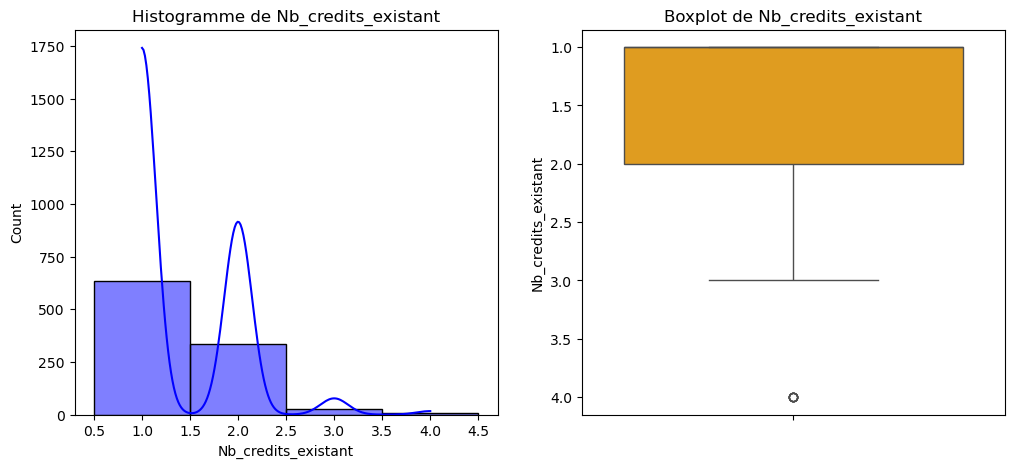

Test de Shapiro-Wilk pour Nb_credits_existant :
Statistique = 0.660, p-valeur = 0.000
La distribution de Nb_credits_existant n'est pas normale (p <= 0.05).


In [5]:
eda.univariate_analysis(data, 'Nb_credits_existant')

In [6]:
eda.detect_outliers(data, ['Nb_credits_existant'])

{}

In [7]:
eda.study_relationships(data, target_column)

,test,p-value
Statut_compte_courant,Chi2,0.0
Duree_mois,ANOVA,0.0
Historique_credit,Chi2,0.0
Objectif,Chi2,0.000116
Montant_credit,ANOVA,0.000001
Compte_epargne,Chi2,0.0
Emploi_actuel_depuis,Chi2,0.001045
Taux_versement,Chi2,0.140033
Statut_personnel_sexe,Chi2,0.022238
Autres_debiteurs,Chi2,0.036056


In [8]:
eda.variable_importance(data, target_column)

,Importance
Duree_mois,0.214927
Montant_credit,0.154739
Statut_compte_courant,0.065668
Historique_credit,0.030234
Compte_epargne,0.019488
Objectif,0.017255
Propriete,0.011773
Emploi_actuel_depuis,0.009082
Logement,0.008840
Autres_plans_versement,0.006152


In [9]:
df.dtypes

Statut_compte_courant       object
Duree_mois                   int64
Historique_credit           object
Objectif                    object
Montant_credit               int64
Compte_epargne              object
Emploi_actuel_depuis        object
Taux_versement            category
Statut_personnel_sexe       object
Autres_debiteurs            object
Residence_depuis          category
Propriete                   object
Age_annees                   int64
Autres_plans_versement      object
Logement                    object
Nb_credits_existant       category
Travail                     object
Nb_personnes_a_charge     category
Telephone                   object
Travailleur_etranger        object
Cible                     category
dtype: object

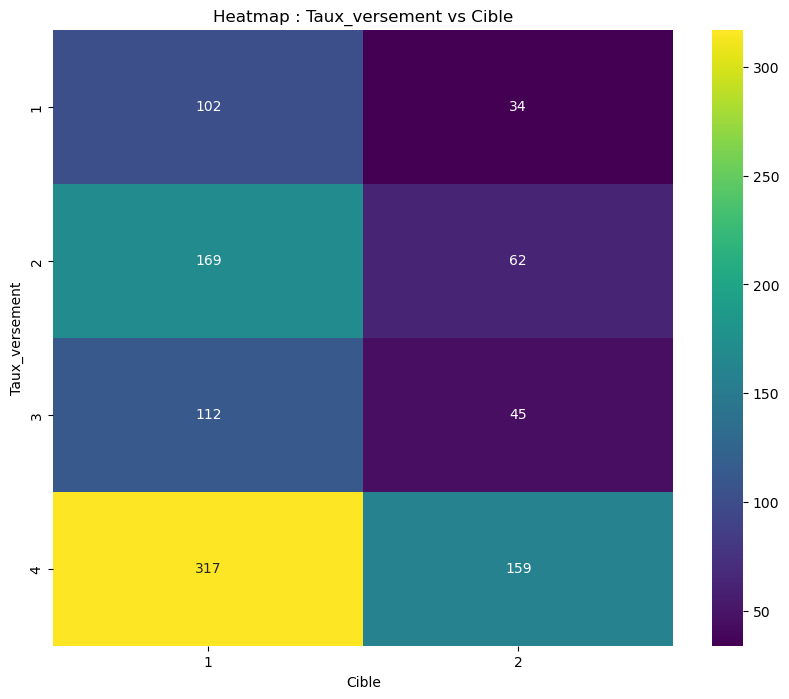

In [10]:
eda.bivariate_analysis(df, column1="Taux_versement", column2=target_column)

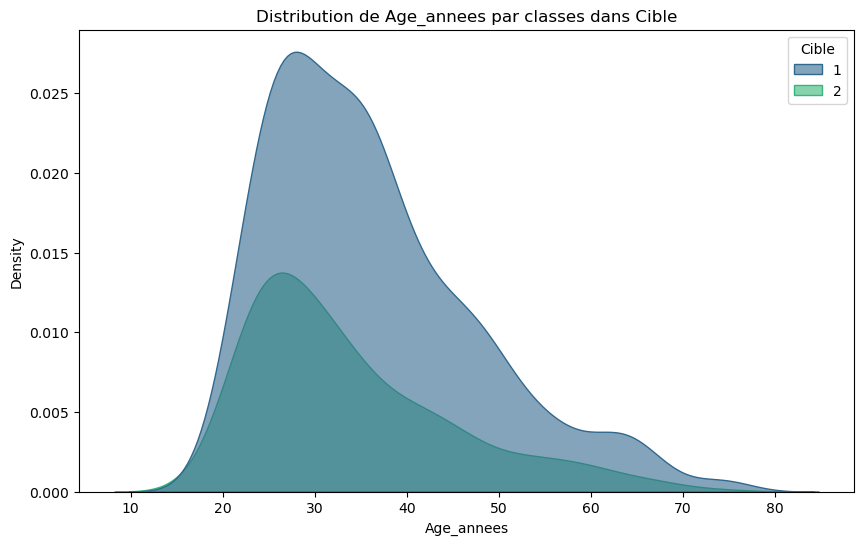

In [11]:
eda.compare_distributions(df, column="Age_annees", target_column=target_column)


Distribution des classes :
 Cible
1    700
2    300
Name: count, dtype: int64


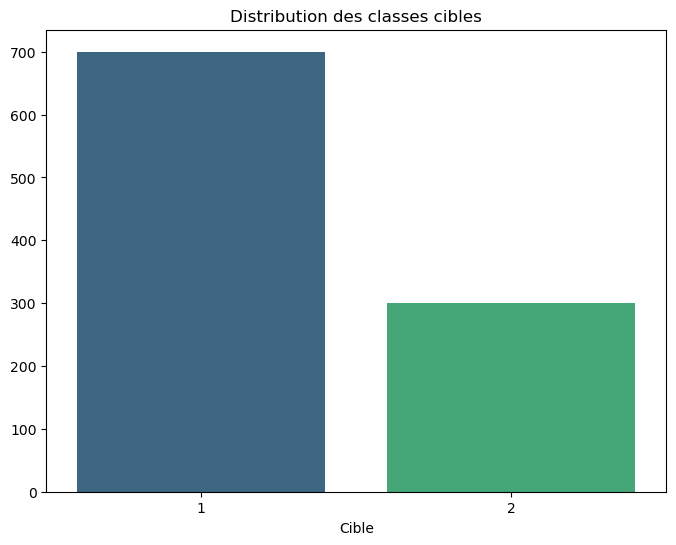

In [12]:
eda.analyze_class_imbalance(data, target_column)

## Data preparation

In [13]:
#### Cette partie est inclue dans le module Modelisation, car chaque modele requiert une preparation specifique
# du coup ici : on organize les donnes, pour pouvoir les modeliser.
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=target_column)  # Drop the target column to get features
y = data[target_column]                # Select the target column as the labels

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


## Modelisation

#### Logistic regression

In [15]:
import evaluation
from sklearn.metrics import accuracy_score  # Ensure this is imported


final_results = {}

# Ici ce que je fais est de garder le modele qui donne la meilleure accuracy avec la technique la plus optimale entre oversampling, undersampling, et la methode combinée
models = {
    "Logistic Regression": logistic_regression_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func,model_name, X_train, y_train)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")



Evaluating Logistic Regression...
Applying SMOTE for oversampling...
Encodage One-Hot effectué.
Calcul des VIF terminé.
Équilibrage effectué avec SMOTE (oversampling).
Running Logistic Regression grid search...
Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Oversampling): Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Oversampling): 0.3013
Applying NearMiss for undersampling...
Encodage One-Hot effectué.
Calcul des VIF terminé.
Équilibrage effectué avec NearMiss (undersampling).
Running Logistic Regression grid search...
Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression (Undersampling): Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for Logistic Regression (Undersampling): 0.6550
Applying SMOTETomek for combination...
Encodage One-Hot effectué.
Calcul des VIF terminé.
Équilibrage effectué avec SMOTETomek (combination).
Running Logistic Regression grid se

Mapping target labels {1, 2} to {0, 1} for compatibility...

Training the best model (Combination) with parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Encodage One-Hot effectué.
Calcul des VIF terminé.
Running Logistic Regression grid search...
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


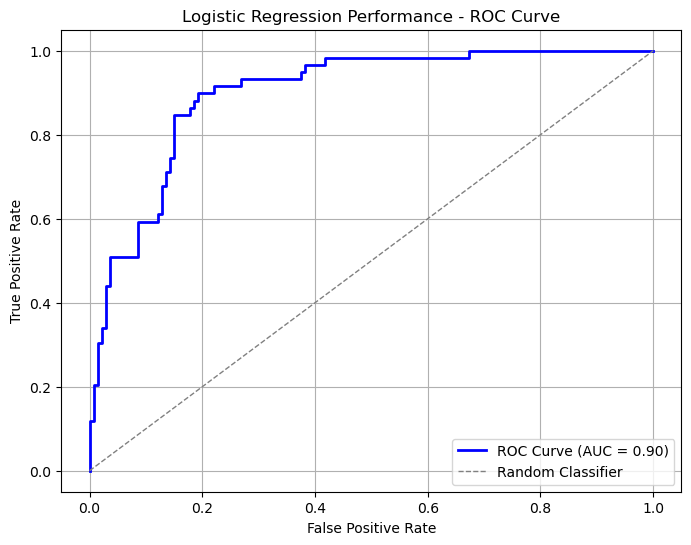

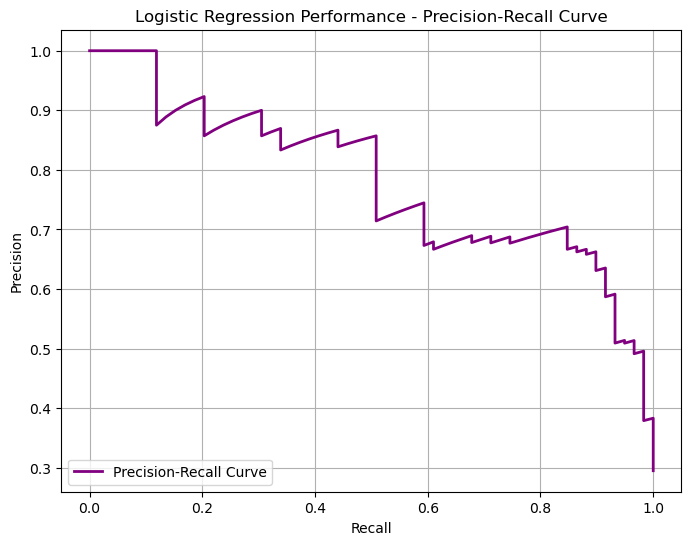

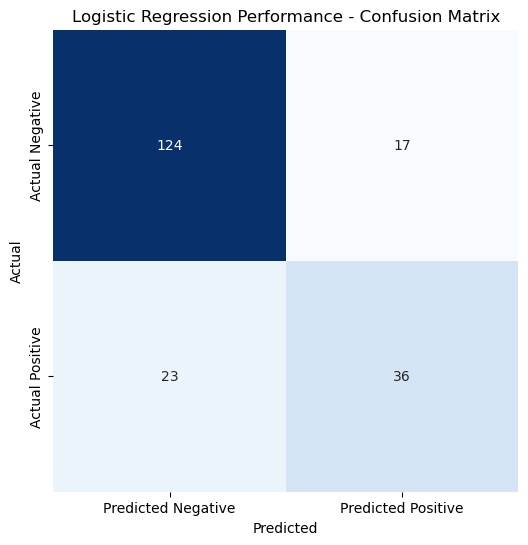


Logistic Regression Performance - Classification Report

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       141
           1       0.68      0.61      0.64        59

    accuracy                           0.80       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.80      0.80      0.80       200



In [16]:
# Import necessary modules
from supervised import logistic_regression_model

# Import necessary modules
from supervised import logistic_regression_model
from evaluation import full_analysis_with_visuals

# Train OneHotEncoder during training phase
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
encoder.fit(X_train[categorical_cols])

# Call full analysis
full_analysis_with_visuals(
    model_name="Logistic Regression",
    model_func=logistic_regression_model,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=model_name+" Performance"
)



#### Decision Tree

In [17]:
import evaluation


final_results = {}

# Ici ce que je fais est de garder le modele qui donne la meilleure accuracy avec la technique la plus optimale entre oversampling, undersampling, et la methode combinée
models = {
        "Decision Tree": decision_tree_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func,model_name, X_train, y_train)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")



Evaluating Decision Tree...
Applying SMOTE for oversampling...
Encodage Label effectué.
Équilibrage effectué avec SMOTE (oversampling).
Running Decision Tree grid search...
Decision Tree (Oversampling): Best Params: {'max_depth': 10, 'min_samples_split': 2}
Accuracy for Decision Tree (Oversampling): 0.3013
Applying NearMiss for undersampling...
Encodage Label effectué.
Équilibrage effectué avec NearMiss (undersampling).
Running Decision Tree grid search...
Decision Tree (Undersampling): Best Params: {'max_depth': 30, 'min_samples_split': 2}
Accuracy for Decision Tree (Undersampling): 0.7362
Applying SMOTETomek for combination...
Encodage Label effectué.
Équilibrage effectué avec SMOTETomek (combination).
Running Decision Tree grid search...
Decision Tree (Combination): Best Params: {'max_depth': None, 'min_samples_split': 5}
Accuracy for Decision Tree (Combination): 0.9150

Best Sampling Method for Decision Tree: Combination with Accuracy: 0.9150

Results:
Oversampling: Accuracy = 0.3

Mapping target labels {1, 2} to {0, 1} for compatibility...

Training the best model (Combination) with parameters: {'max_depth': None, 'min_samples_split': 5}
Encodage Label effectué.
Running Decision Tree grid search...


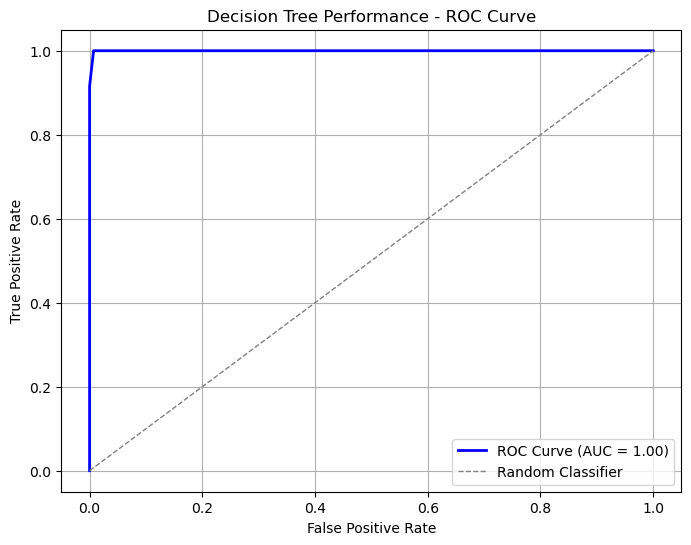

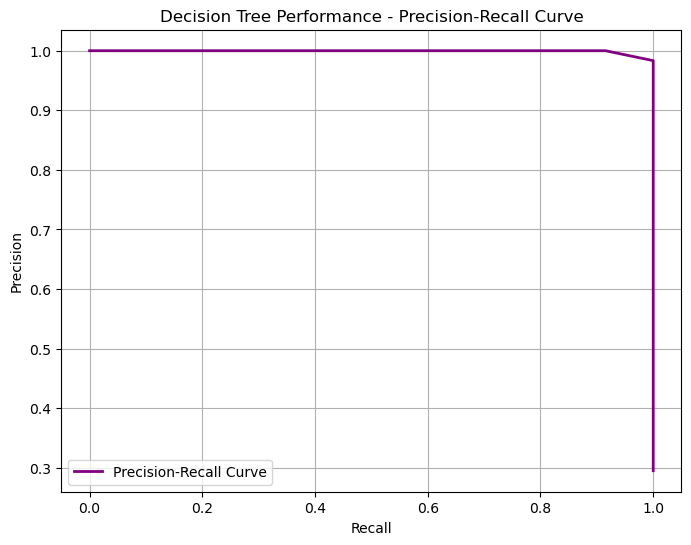

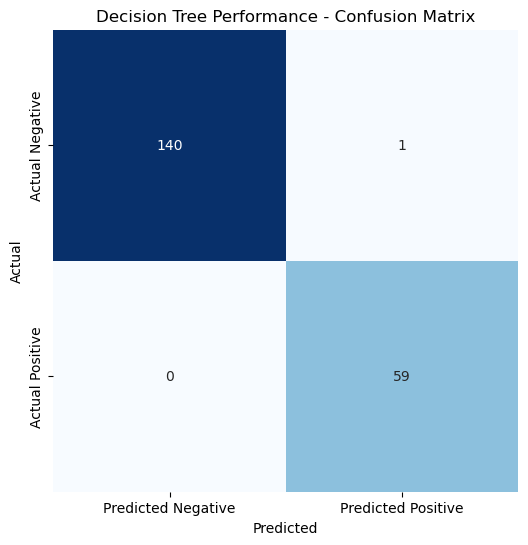


Decision Tree Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       141
           1       0.98      1.00      0.99        59

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [18]:
# Import necessary modules
from supervised import decision_tree_model

# Import necessary modules
from evaluation import full_analysis_with_visuals

# Train OneHotEncoder during training phase
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
encoder.fit(X_train[categorical_cols])

# Call full analysis
full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=model_name+" Performance"
)



#### Random Forest

In [19]:
import evaluation
from sklearn.metrics import accuracy_score  # Ensure this is imported


final_results = {}

# Ici ce que je fais est de garder le modele qui donne la meilleure accuracy avec la technique la plus optimale entre oversampling, undersampling, et la methode combinée
models = {
    "Random Forest": random_forest_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func,model_name, X_train, y_train)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")



Evaluating Random Forest...
Applying SMOTE for oversampling...
Encodage Label effectué.
Équilibrage effectué avec SMOTE (oversampling).
Running Random Forest grid search...
Random Forest (Oversampling): Best Params: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Random Forest (Oversampling): 0.3013
Applying NearMiss for undersampling...
Encodage Label effectué.
Équilibrage effectué avec NearMiss (undersampling).
Running Random Forest grid search...
Random Forest (Undersampling): Best Params: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy for Random Forest (Undersampling): 0.7113
Applying SMOTETomek for combination...
Encodage Label effectué.
Équilibrage effectué avec SMOTETomek (combination).
Running Random Forest grid search...
Random Forest (Combination): Best Params: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy for Random Forest (Combination): 0.9487

Best Sampling Method for Random Forest: Combinatio

Mapping target labels {1, 2} to {0, 1} for compatibility...

Training the best model (Combination) with parameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}
Encodage Label effectué.
Running Random Forest grid search...


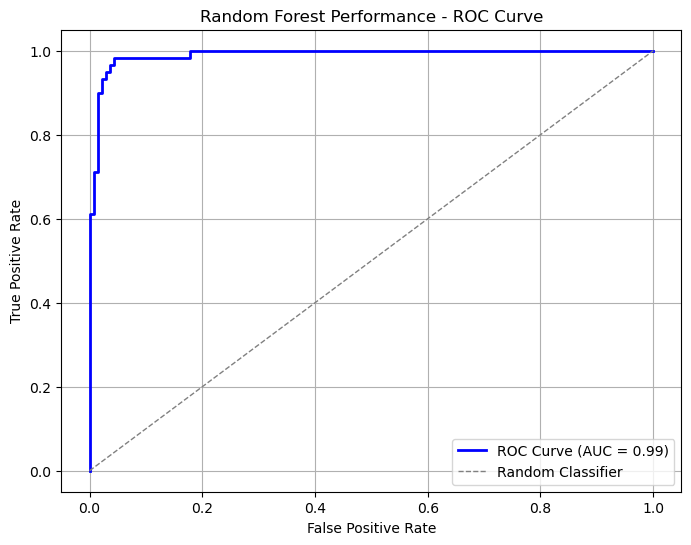

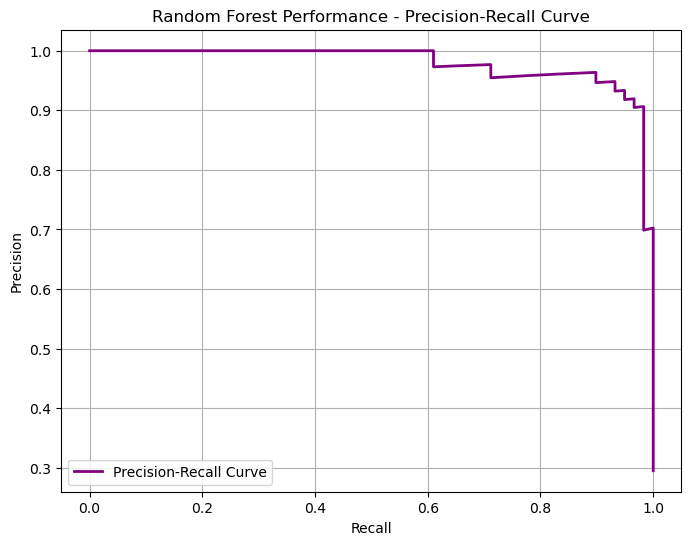

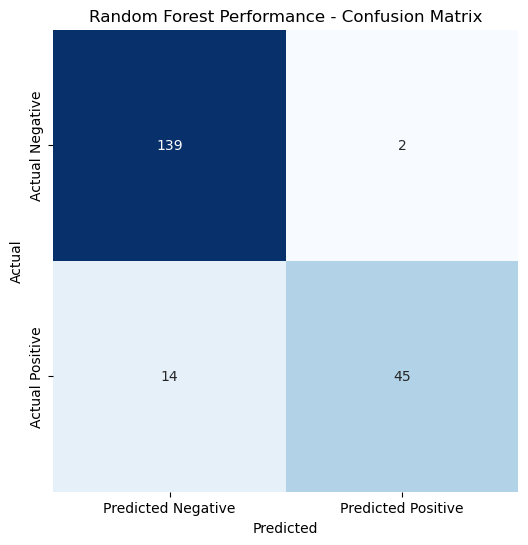


Random Forest Performance - Classification Report

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       141
           1       0.96      0.76      0.85        59

    accuracy                           0.92       200
   macro avg       0.93      0.87      0.90       200
weighted avg       0.92      0.92      0.92       200



In [20]:
# Import necessary modules
from supervised import logistic_regression_model

# Import necessary modules
from supervised import logistic_regression_model
from evaluation import full_analysis_with_visuals

# Train OneHotEncoder during training phase
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
encoder.fit(X_train[categorical_cols])

# Call full analysis
full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title= model_name + " Performance"
)



#### KNN

In [21]:
import evaluation
from sklearn.metrics import accuracy_score  # Ensure this is imported


final_results = {}

# Ici ce que je fais est de garder le modele qui donne la meilleure accuracy avec la technique la plus optimale entre oversampling, undersampling, et la methode combinée
models = {
    "KNN": knn_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func,model_name, X_train, y_train)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")



Evaluating KNN...
Applying SMOTE for oversampling...
Encodage One-Hot effectué.
Données normalisées avec la méthode 'standard'.
Équilibrage effectué avec SMOTE (oversampling).
Running KNN grid search...
KNN (Oversampling): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Oversampling): 0.5337
Applying NearMiss for undersampling...
Encodage One-Hot effectué.
Données normalisées avec la méthode 'standard'.
Équilibrage effectué avec NearMiss (undersampling).
Running KNN grid search...
KNN (Undersampling): Best Params: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy for KNN (Undersampling): 0.3013
Applying SMOTETomek for combination...
Encodage One-Hot effectué.
Données normalisées avec la méthode 'standard'.
Équilibrage effectué avec SMOTETomek (combination).
Running KNN grid search...
KNN (Combination): Best Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy for KNN (Combination): 0.5

Mapping target labels {1, 2} to {0, 1} for compatibility...

Training the best model (Oversampling) with parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Encodage One-Hot effectué.
Données normalisées avec la méthode 'standard'.
Running KNN grid search...


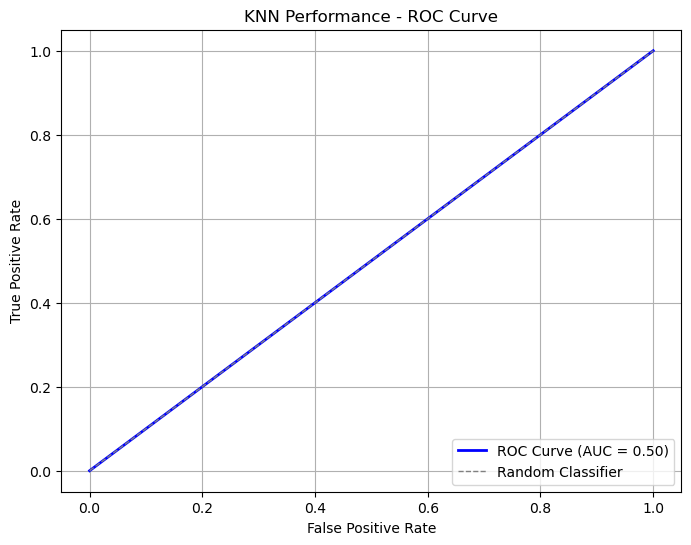

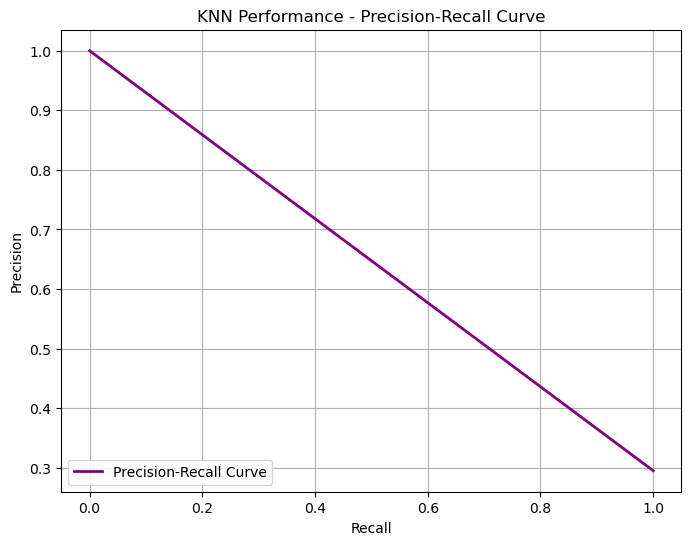

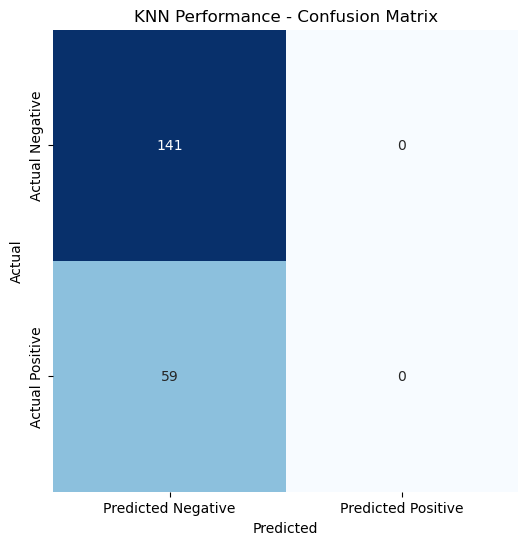


KNN Performance - Classification Report

              precision    recall  f1-score   support

           0       0.70      1.00      0.83       141
           1       0.00      0.00      0.00        59

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



In [22]:
# Import necessary modules
from supervised import decision_tree_model

# Import necessary modules
from evaluation import full_analysis_with_visuals

# Train OneHotEncoder during training phase
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
encoder.fit(X_train[categorical_cols])

# Call full analysis
full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=model_name+" Performance"
)



#### Linear and Non Linear SVM

In [23]:
import evaluation
from sklearn.metrics import accuracy_score  # Ensure this is imported


final_results = {}

# Ici ce que je fais est de garder le modele qui donne la meilleure accuracy avec la technique la plus optimale entre oversampling, undersampling, et la methode combinée
models = {
    "SVM": svm_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func,model_name, X_train, y_train)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")



Evaluating SVM...
Applying SMOTE for oversampling...
Encodage One-Hot effectué.
Données normalisées avec la méthode 'standard'.
Équilibrage effectué avec SMOTE (oversampling).
Running SVM grid search...
SVM (Oversampling): Best Params: {'C': 10, 'kernel': 'rbf'}
Accuracy for SVM (Oversampling): 0.6987
Applying NearMiss for undersampling...
Encodage One-Hot effectué.
Données normalisées avec la méthode 'standard'.
Équilibrage effectué avec NearMiss (undersampling).
Running SVM grid search...
SVM (Undersampling): Best Params: {'C': 1, 'kernel': 'rbf'}
Accuracy for SVM (Undersampling): 0.3013
Applying SMOTETomek for combination...
Encodage One-Hot effectué.
Données normalisées avec la méthode 'standard'.
Équilibrage effectué avec SMOTETomek (combination).
Running SVM grid search...
SVM (Combination): Best Params: {'C': 100, 'kernel': 'rbf'}
Accuracy for SVM (Combination): 0.6987

Best Sampling Method for SVM: Oversampling with Accuracy: 0.6987

Results:
Oversampling: Accuracy = 0.6987, B

Mapping target labels {1, 2} to {0, 1} for compatibility...

Training the best model (Oversampling) with parameters: {'C': 10, 'kernel': 'rbf'}
Encodage One-Hot effectué.
Données normalisées avec la méthode 'standard'.
Running SVM grid search...


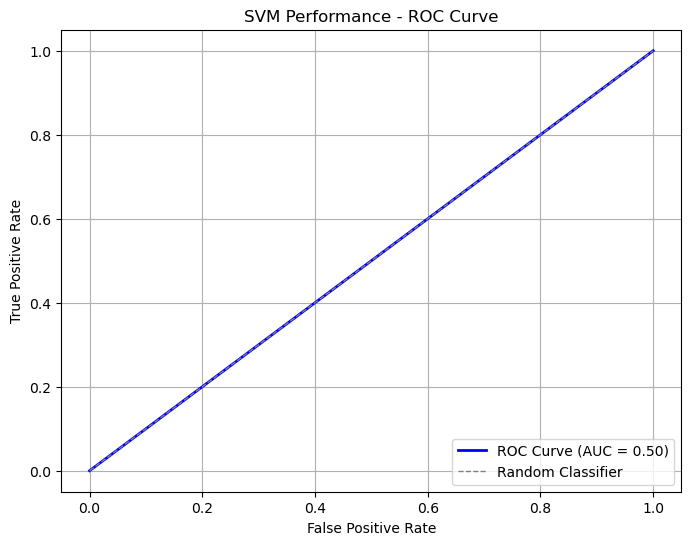

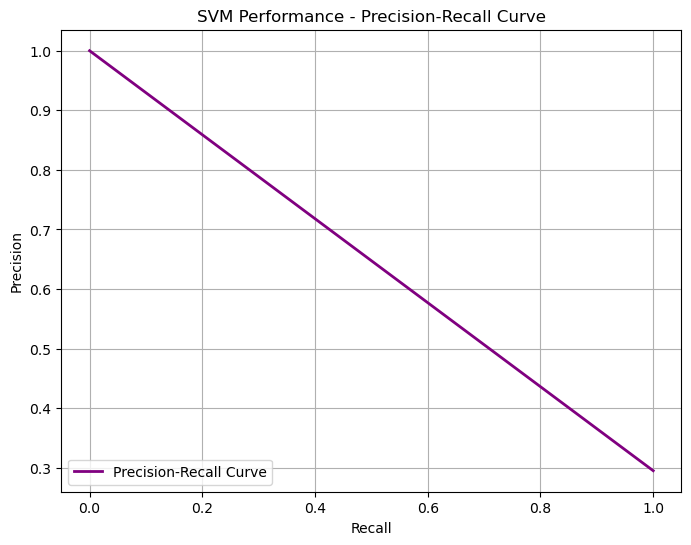

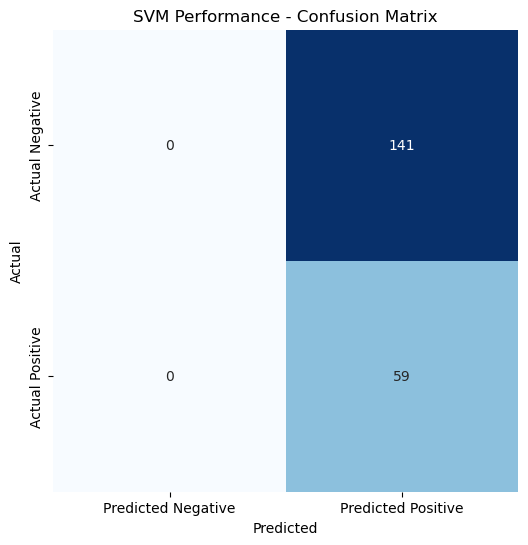


SVM Performance - Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.29      1.00      0.46        59

    accuracy                           0.29       200
   macro avg       0.15      0.50      0.23       200
weighted avg       0.09      0.29      0.13       200



In [24]:

# Import necessary modules
from evaluation import full_analysis_with_visuals

# Train OneHotEncoder during training phase
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
encoder.fit(X_train[categorical_cols])

# Call full analysis
full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=model_name+" Performance"
)



#### Nqiive Bqyes

In [25]:
import evaluation
from sklearn.metrics import accuracy_score  # Ensure this is imported


final_results = {}

# Ici ce que je fais est de garder le modele qui donne la meilleure accuracy avec la technique la plus optimale entre oversampling, undersampling, et la methode combinée
models = {
    "Naive Bayes": naive_bayes_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func,model_name, X_train, y_train)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")



Evaluating Naive Bayes...
Applying SMOTE for oversampling...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTE (oversampling).
Fitting Naive Bayes...
Naive Bayes (Oversampling): Best Params: None
Accuracy for Naive Bayes (Oversampling): 0.3013
Applying NearMiss for undersampling...
Encodage One-Hot effectué.
Équilibrage effectué avec NearMiss (undersampling).
Fitting Naive Bayes...
Naive Bayes (Undersampling): Best Params: None
Accuracy for Naive Bayes (Undersampling): 0.6138
Applying SMOTETomek for combination...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTETomek (combination).
Fitting Naive Bayes...
Naive Bayes (Combination): Best Params: None
Accuracy for Naive Bayes (Combination): 0.7375

Best Sampling Method for Naive Bayes: Combination with Accuracy: 0.7375

Results:
Oversampling: Accuracy = 0.3013, Best Params = None
Undersampling: Accuracy = 0.6138, Best Params = None
Combination: Accuracy = 0.7375, Best Params = None

Best Sampling Method: Combination


Mapping target labels {1, 2} to {0, 1} for compatibility...

Training the best model (Combination) with parameters: None
Encodage One-Hot effectué.
Fitting Naive Bayes...


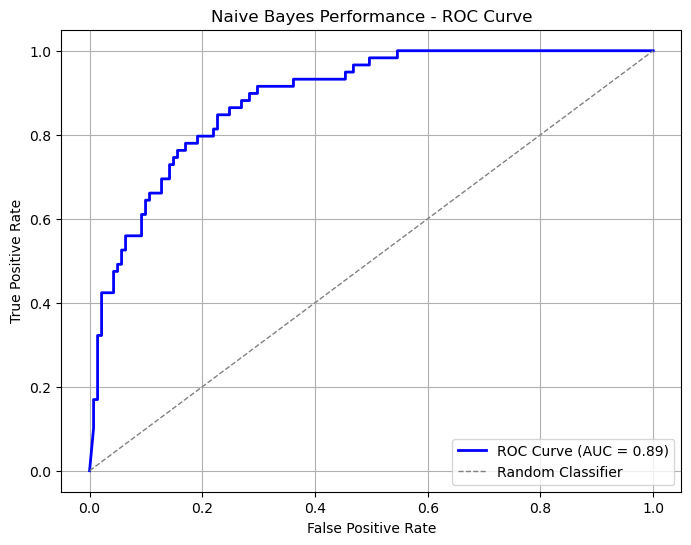

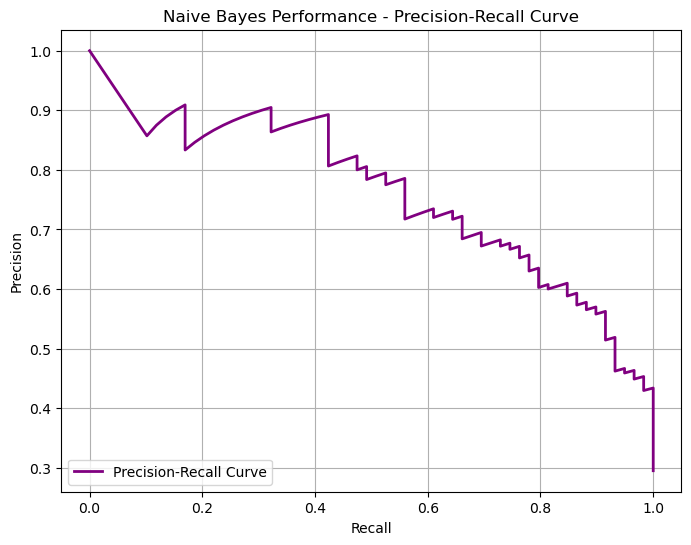

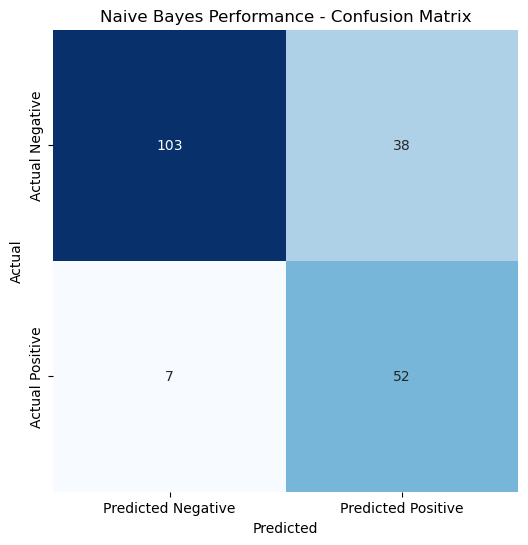


Naive Bayes Performance - Classification Report

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       141
           1       0.58      0.88      0.70        59

    accuracy                           0.78       200
   macro avg       0.76      0.81      0.76       200
weighted avg       0.83      0.78      0.78       200



In [26]:
# Import necessary modules
from supervised import decision_tree_model

# Import necessary modules
from evaluation import full_analysis_with_visuals

# Train OneHotEncoder during training phase
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
encoder.fit(X_train[categorical_cols])

# Call full analysis
full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=model_name+" Performance"
)



#### Grqdient Boosting Model

In [27]:
import evaluation
from sklearn.metrics import accuracy_score  # Ensure this is imported


final_results = {}

# Ici ce que je fais est de garder le modele qui donne la meilleure accuracy avec la technique la plus optimale entre oversampling, undersampling, et la methode combinée
models = {
    "Gradient Boosting": gradient_boosting_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func,model_name, X_train, y_train)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")



Evaluating Gradient Boosting...
Applying SMOTE for oversampling...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTE (oversampling).
Running Gradient Boosting grid search...
Gradient Boosting (Oversampling): Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy for Gradient Boosting (Oversampling): 0.3013
Applying NearMiss for undersampling...
Encodage One-Hot effectué.
Équilibrage effectué avec NearMiss (undersampling).
Running Gradient Boosting grid search...
Gradient Boosting (Undersampling): Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy for Gradient Boosting (Undersampling): 0.6175
Applying SMOTETomek for combination...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTETomek (combination).
Running Gradient Boosting grid search...
Gradient Boosting (Combination): Best Params: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Accuracy for Gradient Boosting (Combination): 0.9537

Best Sampling 

Mapping target labels {1, 2} to {0, 1} for compatibility...

Training the best model (Combination) with parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Encodage One-Hot effectué.
Running Gradient Boosting grid search...


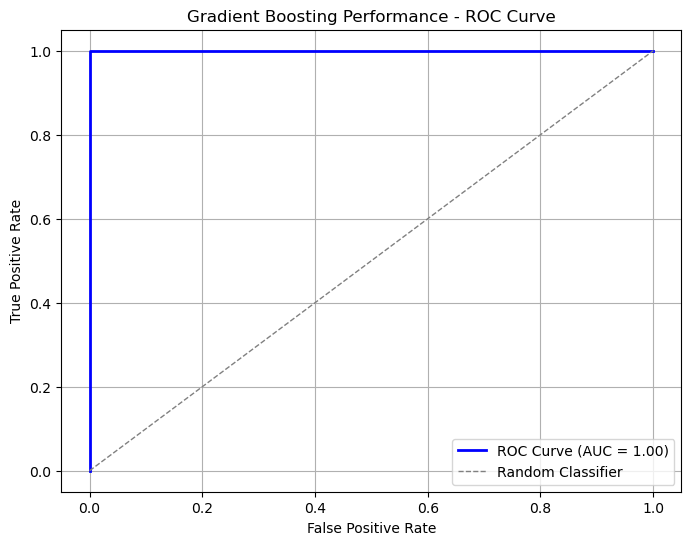

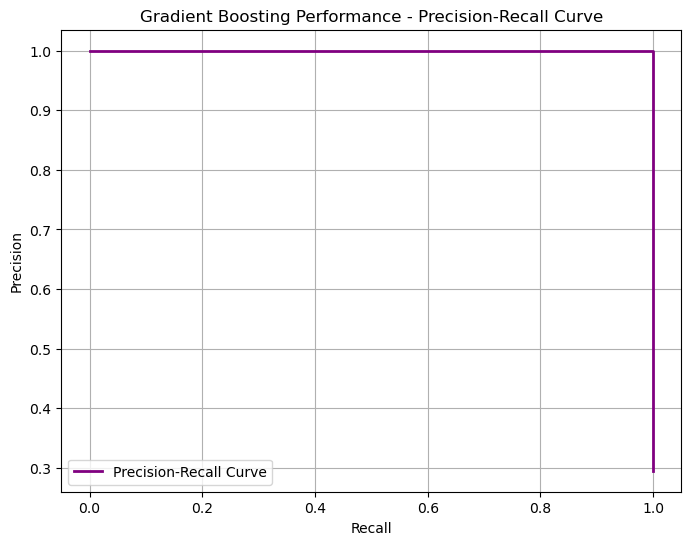

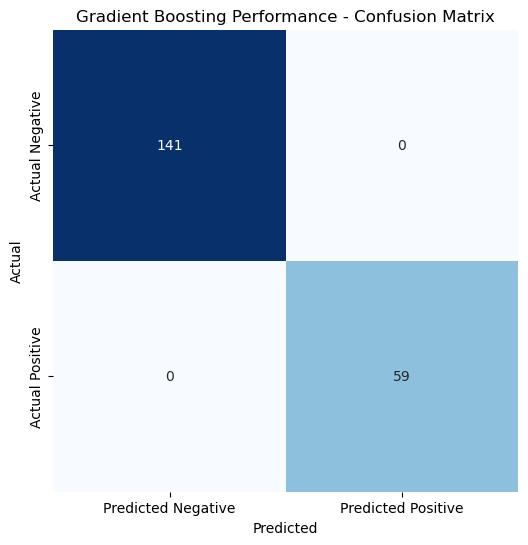


Gradient Boosting Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00        59

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [28]:
# Import necessary modules
from supervised import decision_tree_model

# Import necessary modules
from evaluation import full_analysis_with_visuals

# Train OneHotEncoder during training phase
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
encoder.fit(X_train[categorical_cols])

# Call full analysis
full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=model_name+" Performance"
)



### AdaBoost

In [29]:
from supervised import adaboost_model
import evaluation
from sklearn.preprocessing import OneHotEncoder

# Evaluate AdaBoost
models = {
    "AdaBoost": adaboost_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train, y_train)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")



Evaluating AdaBoost...
Applying SMOTE for oversampling...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTE (oversampling).
Running AdaBoost grid search...
AdaBoost (Oversampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Oversampling): 0.3013
Applying NearMiss for undersampling...
Encodage One-Hot effectué.
Équilibrage effectué avec NearMiss (undersampling).
Running AdaBoost grid search...
AdaBoost (Undersampling): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Undersampling): 0.6438
Applying SMOTETomek for combination...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTETomek (combination).
Running AdaBoost grid search...
AdaBoost (Combination): Best Params: {'learning_rate': 0.2, 'n_estimators': 200}
Accuracy for AdaBoost (Combination): 0.7863

Best Sampling Method for AdaBoost: Combination with Accuracy: 0.7863

Results:
Oversampling: Accuracy = 0.3013, Best Params = {'learning_rate': 0.2, 'n_

Mapping target labels {1, 2} to {0, 1} for compatibility...

Training the best model (Combination) with parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Encodage One-Hot effectué.
Running AdaBoost grid search...


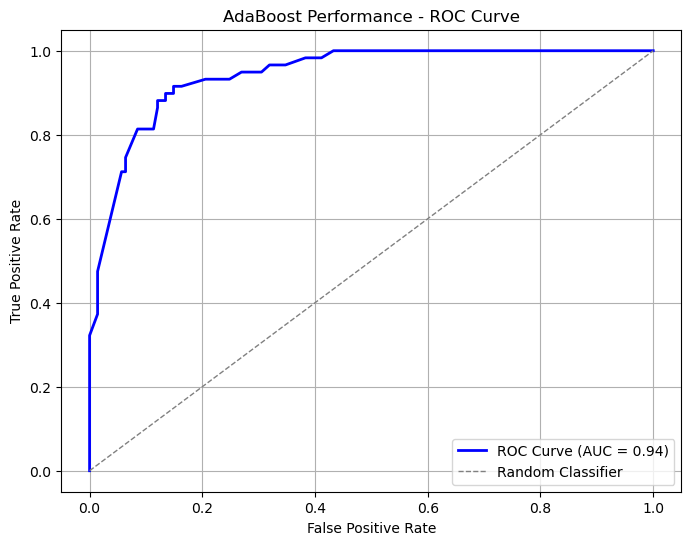

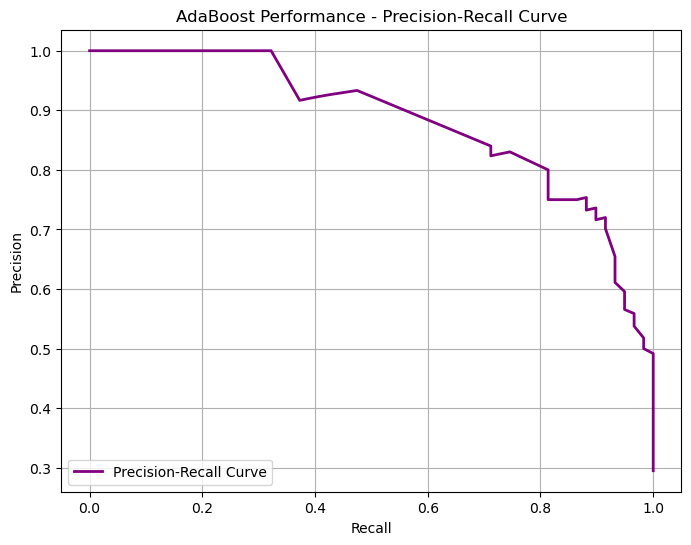

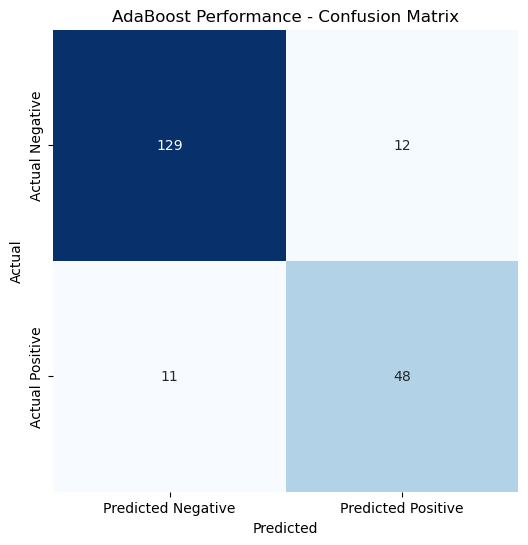


AdaBoost Performance - Classification Report

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       141
           1       0.80      0.81      0.81        59

    accuracy                           0.89       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.89      0.89      0.89       200



In [30]:

# Train OneHotEncoder during training phase
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
encoder.fit(X_train[categorical_cols])

# Full analysis
evaluation.full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=model_name + " Performance"
)


#### XGboost

In [32]:
# Adjust y_train and y_test to match expected values
y_train_adjusted = y_train.replace({1: 0, 2: 1})
y_test_adjusted = y_test.replace({1: 0, 2: 1})

from supervised import xgboost_model
import evaluation
from sklearn.preprocessing import OneHotEncoder

# Evaluate XGBoost
models = {
    "XGBoost": xgboost_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train, y_train_adjusted)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")




Evaluating XGBoost...
Applying SMOTE for oversampling...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTE (oversampling).
Running XGBoost grid search...
XGBoost (Oversampling): Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy for XGBoost (Oversampling): 0.3013
Applying NearMiss for undersampling...
Encodage One-Hot effectué.
Équilibrage effectué avec NearMiss (undersampling).
Running XGBoost grid search...
XGBoost (Undersampling): Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Accuracy for XGBoost (Undersampling): 0.6887
Applying SMOTETomek for combination...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTETomek (combination).
Running XGBoost grid search...
XGBoost (Combination): Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Accuracy for XGBoost (Combination): 0.8962

Best Sampling Method for XGBoost: Combination with Accuracy: 0.8962

Results:
Oversampling: Accuracy = 0.3013, Best

Mapping target labels {1, 2} to {0, 1} for compatibility...

Training the best model (Combination) with parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Encodage One-Hot effectué.
Running XGBoost grid search...


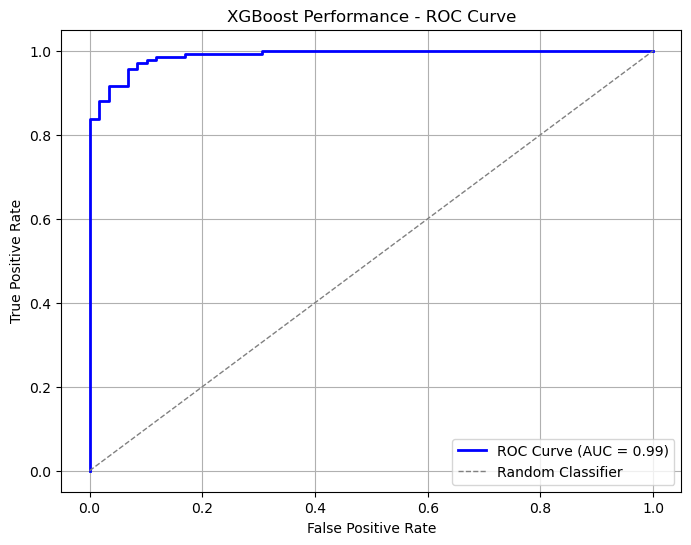

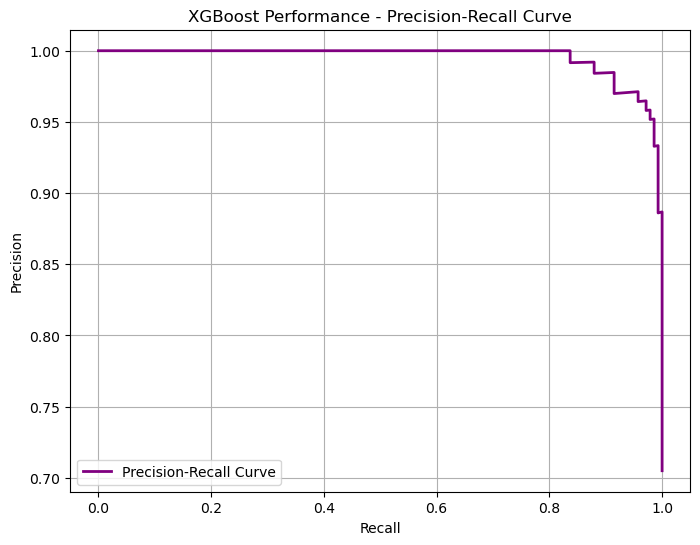

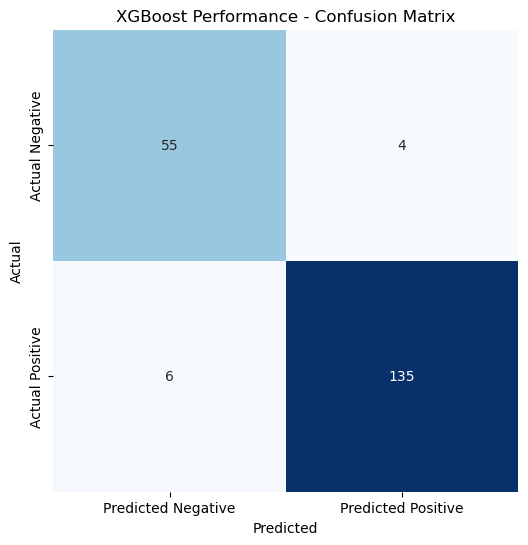


XGBoost Performance - Classification Report

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        59
           1       0.97      0.96      0.96       141

    accuracy                           0.95       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.95      0.95       200



In [33]:
# Train OneHotEncoder during training phase
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
encoder.fit(X_train[categorical_cols])

# Full analysis
evaluation.full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test_adjusted,
    encoder=encoder,
    title=model_name + " Performance"
)


#### Xtra Trees

In [34]:
from supervised import extra_trees_model
import evaluation
from sklearn.preprocessing import OneHotEncoder

# Evaluate Extra Trees
models = {
    "Extra Trees": extra_trees_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train, y_train)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")




Evaluating Extra Trees...
Applying SMOTE for oversampling...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTE (oversampling).
Running Extra Trees grid search...
Extra Trees (Oversampling): Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy for Extra Trees (Oversampling): 0.3013
Applying NearMiss for undersampling...
Encodage One-Hot effectué.
Équilibrage effectué avec NearMiss (undersampling).
Running Extra Trees grid search...
Extra Trees (Undersampling): Best Params: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy for Extra Trees (Undersampling): 0.7725
Applying SMOTETomek for combination...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTETomek (combination).
Running Extra Trees grid search...
Extra Trees (Combination): Best Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy for Extra Trees (Combination): 0.9575

Best Sampling Method for Extra Trees: Combination with Accurac

Mapping target labels {1, 2} to {0, 1} for compatibility...

Training the best model (Combination) with parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Encodage One-Hot effectué.
Running Extra Trees grid search...


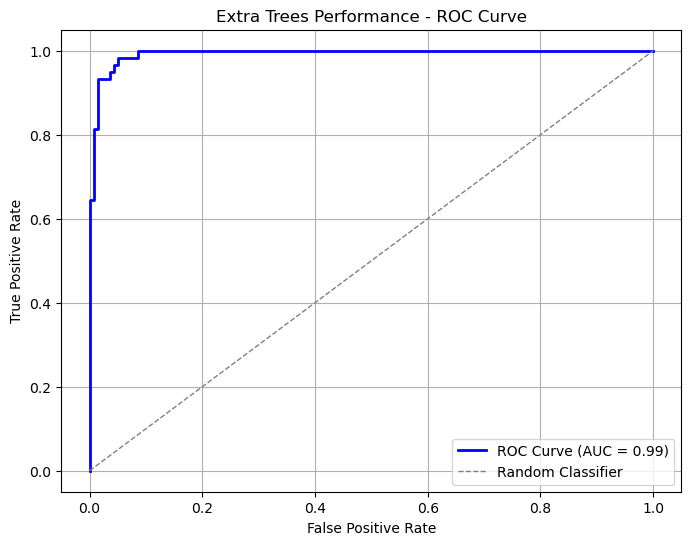

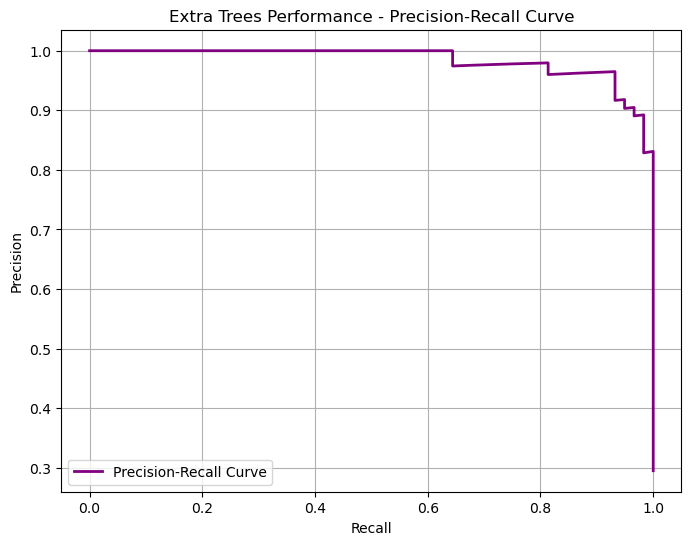

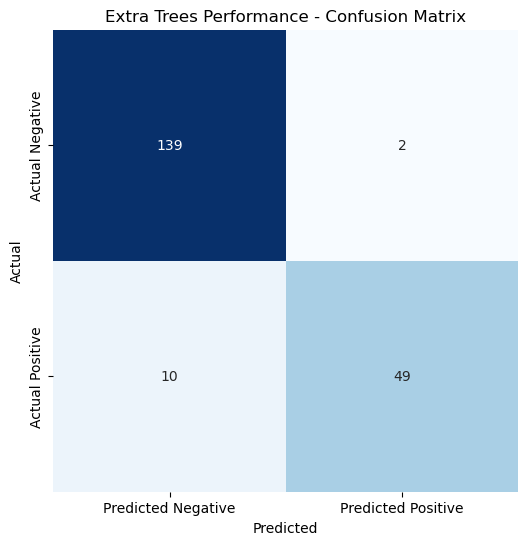


Extra Trees Performance - Classification Report

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       141
           1       0.96      0.83      0.89        59

    accuracy                           0.94       200
   macro avg       0.95      0.91      0.92       200
weighted avg       0.94      0.94      0.94       200



In [35]:
# Train OneHotEncoder during training phase
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
encoder.fit(X_train[categorical_cols])

# Full analysis
evaluation.full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=model_name + " Performance"
)


#### LDA

In [36]:
from supervised import lda_model
import evaluation
from sklearn.preprocessing import OneHotEncoder

# Evaluate LDA
models = {
    "LDA": lda_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train, y_train)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")




Evaluating LDA...
Applying SMOTE for oversampling...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTE (oversampling).
Fitting LDA...
LDA (Oversampling): Best Params: None
Accuracy for LDA (Oversampling): 0.3013
Applying NearMiss for undersampling...
Encodage One-Hot effectué.
Équilibrage effectué avec NearMiss (undersampling).
Fitting LDA...
LDA (Undersampling): Best Params: None
Accuracy for LDA (Undersampling): 0.7087
Applying SMOTETomek for combination...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTETomek (combination).
Fitting LDA...
LDA (Combination): Best Params: None
Accuracy for LDA (Combination): 0.7500

Best Sampling Method for LDA: Combination with Accuracy: 0.7500

Results:
Oversampling: Accuracy = 0.3013, Best Params = None
Undersampling: Accuracy = 0.7087, Best Params = None
Combination: Accuracy = 0.7500, Best Params = None

Best Sampling Method: Combination


Mapping target labels {1, 2} to {0, 1} for compatibility...

Training the best model (Combination) with parameters: None
Encodage One-Hot effectué.
Fitting LDA...


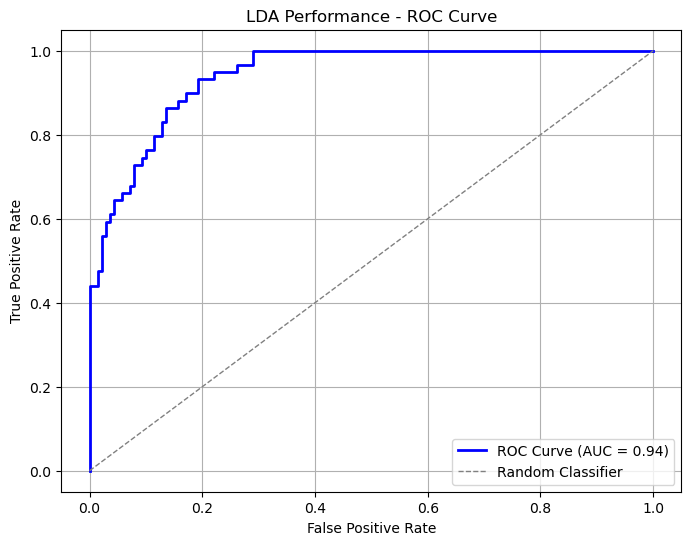

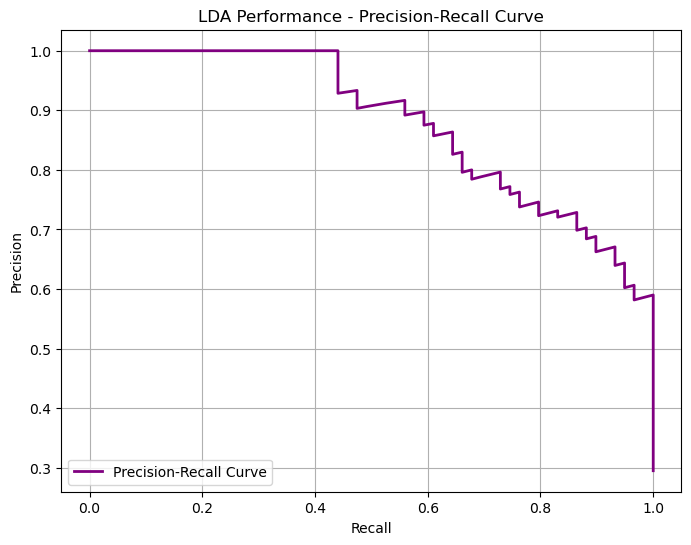

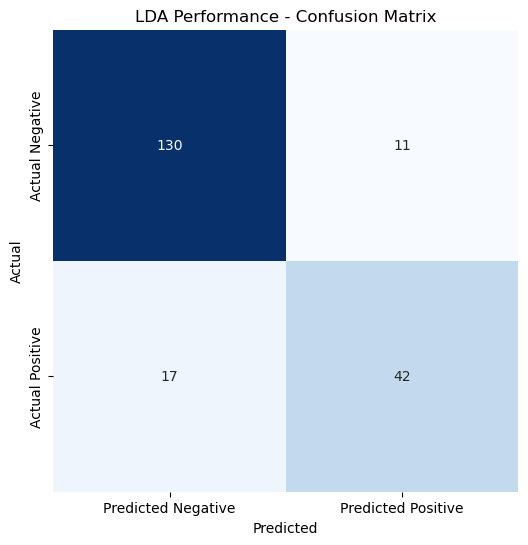


LDA Performance - Classification Report

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       141
           1       0.79      0.71      0.75        59

    accuracy                           0.86       200
   macro avg       0.84      0.82      0.83       200
weighted avg       0.86      0.86      0.86       200



In [37]:
# Train OneHotEncoder during training phase
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
encoder.fit(X_train[categorical_cols])

# Full analysis
evaluation.full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=model_name + " Performance"
)


#### QDA

In [38]:
from supervised import qda_model
import evaluation
from sklearn.preprocessing import OneHotEncoder

# Evaluate QDA
models = {
    "QDA": qda_model
}

for model_name, model_func in models.items():
    results, best_method = evaluation.evaluate_model_with_sampling(model_func, model_name, X_train, y_train)

print("\nResults:")
for method, result in results.items():
    print(f"{method}: Accuracy = {result['Accuracy']:.4f}, Best Params = {result['Best Params']}")

print(f"\nBest Sampling Method: {best_method}")





Evaluating QDA...
Applying SMOTE for oversampling...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTE (oversampling).
Fitting QDA...
QDA (Oversampling): Best Params: None
Accuracy for QDA (Oversampling): 0.3013
Applying NearMiss for undersampling...
Encodage One-Hot effectué.
Équilibrage effectué avec NearMiss (undersampling).
Fitting QDA...
QDA (Undersampling): Best Params: None
Accuracy for QDA (Undersampling): 0.6825
Applying SMOTETomek for combination...
Encodage One-Hot effectué.
Équilibrage effectué avec SMOTETomek (combination).
Fitting QDA...
QDA (Combination): Best Params: None
Accuracy for QDA (Combination): 0.8375

Best Sampling Method for QDA: Combination with Accuracy: 0.8375

Results:
Oversampling: Accuracy = 0.3013, Best Params = None
Undersampling: Accuracy = 0.6825, Best Params = None
Combination: Accuracy = 0.8375, Best Params = None

Best Sampling Method: Combination


Mapping target labels {1, 2} to {0, 1} for compatibility...

Training the best model (Combination) with parameters: None
Encodage One-Hot effectué.
Fitting QDA...


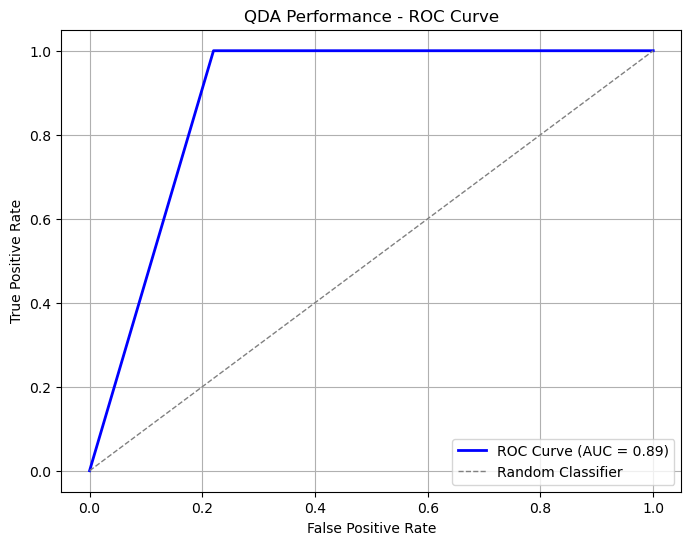

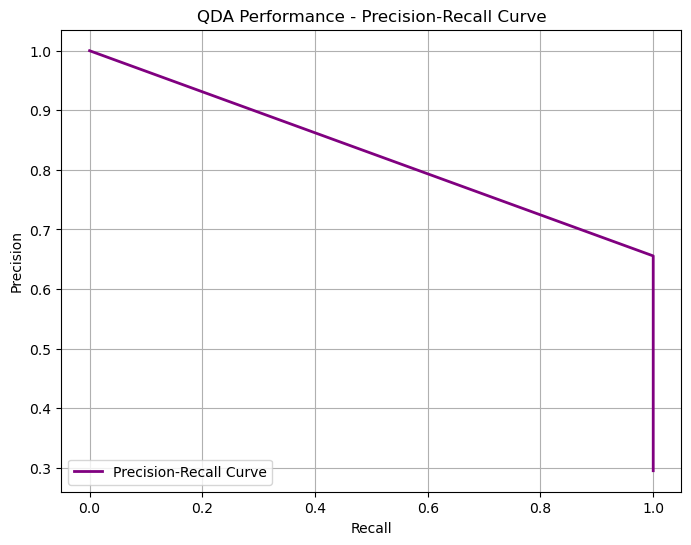

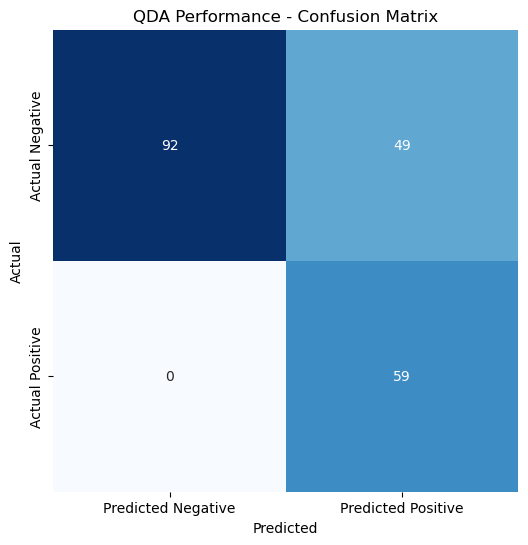


QDA Performance - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       141
           1       0.55      1.00      0.71        59

    accuracy                           0.76       200
   macro avg       0.77      0.83      0.75       200
weighted avg       0.87      0.76      0.77       200



In [39]:
# Train OneHotEncoder during training phase
categorical_cols = X_train.select_dtypes(include=["object", "category"]).columns
encoder = OneHotEncoder(drop="first", sparse=False, handle_unknown="ignore")
encoder.fit(X_train[categorical_cols])

# Full analysis
evaluation.full_analysis_with_visuals(
    model_name=model_name,
    model_func=model_func,
    results=results,
    best_method=best_method,
    X_test=X_test,
    y_test=y_test,
    encoder=encoder,
    title=model_name + " Performance"
)

## Conclusion